<a href="https://colab.research.google.com/github/st-sashou/ai_experimental/blob/master/LSTM%E5%A4%9A%E3%82%AF%E3%83%A9%E3%82%B9%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データ前処理

Google Driveのフォルダをマウントする。

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Kaggleから取得した睡眠データを使用する。

In [2]:
!ls -al '/content/drive/My Drive/Colab Notebooks/ST/My Test LSTM Multi Classification'

total 163
-rw------- 1 root root 98100 Apr 18 06:59 LSTM多クラス分類.ipynb
-rw------- 1 root root 67692 Apr 16 05:10 sleepdata.csv


In [3]:
import pandas as pd

INPUT_FILE = '/content/drive/My Drive/Colab Notebooks/ST/My Test LSTM Multi Classification/sleepdata.csv'
df = pd.read_table(INPUT_FILE, sep=';')
df.head()

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,:),NaN,59.0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,:|,NaN,57.0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,NaN,NaN,NaN,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0


In [4]:
df.dtypes

Start                object
End                  object
Sleep quality        object
Time in bed          object
Wake up              object
Sleep Notes          object
Heart rate          float64
Activity (steps)      int64
dtype: object

Sleep Notes列にどのような値が存在しているか、データをユニークにして確認する。

In [5]:
pd.Series(df['Sleep Notes'].str.split(':', expand=True).values.reshape(-1,)).dropna().unique()

array(['Stressful day', 'Drank coffee', 'Drank tea', 'Ate late',
       'Worked out'], dtype=object)

In [6]:
df['Sleep Notes'].unique()

array([nan, 'Stressful day', 'Drank coffee:Drank tea', 'Drank tea',
       'Ate late:Drank coffee', 'Drank coffee:Drank tea:Worked out',
       'Drank tea:Worked out', 'Drank coffee:Drank tea:Stressful day',
       'Drank coffee', 'Drank coffee:Drank tea:Stressful day:Worked out',
       'Drank coffee:Worked out', 'Ate late:Drank coffee:Drank tea',
       'Ate late:Drank coffee:Drank tea:Worked out',
       'Drank tea:Stressful day', 'Drank tea:Stressful day:Worked out',
       'Drank coffee:Stressful day:Worked out',
       'Drank coffee:Stressful day',
       'Ate late:Drank coffee:Drank tea:Stressful day', 'Worked out',
       'Ate late:Drank coffee:Worked out'], dtype=object)

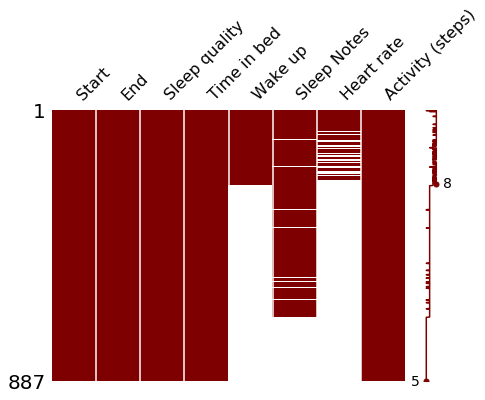

In [7]:
import missingno as msno

msno.matrix(df=df, figsize=(7, 5), color=(0.5, 0, 0))

機械学習用にデータをクレンジングする。

In [0]:
from datetime import datetime as dt
import math

df['Start'] = df['Start'].map(lambda x: dt.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['End'] = df['End'].map(lambda x: dt.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['Sleep quality'] = df['Sleep quality'].map(lambda x: int(x.replace('%', '')) * 0.01)
df['Sleep duration'] = (df['End'] - df['Start']).map(lambda x: round(x.total_seconds() / 60))
df['Wake up well'] = df['Wake up'].map(lambda x: 0.0 if type(x) is not str and math.isnan(x) else (1.0 if x == ':)' else 0.0))

In [9]:
df['Stressful day'] = df['Sleep Notes'].fillna('').map(lambda x: 1 if 'Stressful day' in x else 0)
df['Drank coffee'] = df['Sleep Notes'].fillna('').map(lambda x: 1 if 'Drank coffee' in x else 0)
df['Drank tea'] = df['Sleep Notes'].fillna('').map(lambda x: 1 if 'Drank tea' in x else 0)
df['Ate late'] = df['Sleep Notes'].fillna('').map(lambda x: 1 if 'Ate late' in x else 0)
df['Worked out'] = df['Sleep Notes'].fillna('').map(lambda x: 1 if 'Worked out' in x else 0)
df.head()

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),Sleep duration,Wake up well,Stressful day,Drank coffee,Drank tea,Ate late,Worked out
0,2014-12-29 22:57:49,2014-12-30 07:30:13,1.00,8:32,:),NaN,59.0,0,512,1.0,0,0,0,0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,0.03,0:16,:|,Stressful day,72.0,0,16,0.0,1,0,0,0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,0.98,8:30,:|,NaN,57.0,0,511,0.0,0,0,0,0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,0.65,7:32,NaN,NaN,NaN,0,452,0.0,0,0,0,0,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,0.72,6:44,:),Drank coffee:Drank tea,68.0,0,404,1.0,0,1,1,0,0


In [10]:
df.dtypes

Start               datetime64[ns]
End                 datetime64[ns]
Sleep quality              float64
Time in bed                 object
Wake up                     object
Sleep Notes                 object
Heart rate                 float64
Activity (steps)             int64
Sleep duration               int64
Wake up well               float64
Stressful day                int64
Drank coffee                 int64
Drank tea                    int64
Ate late                     int64
Worked out                   int64
dtype: object

In [11]:
df_ext = df.loc[:676, ['Drank coffee', 'Drank tea', 'Ate late', 'Worked out', 'Sleep quality', 'Sleep duration']]
df_ext.head()

,Drank coffee,Drank tea,Ate late,Worked out,Sleep quality,Sleep duration
0,0,0,0,0,1.00,512
1,0,0,0,0,0.03,16
2,0,0,0,0,0.98,511
3,0,0,0,0,0.65,452
4,1,1,0,0,0.72,404


In [12]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df_norm = pd.DataFrame(mms.fit_transform(df_ext),
                       columns=['Drank coffee', 'Drank tea', 'Ate late', 'Worked out', 'Sleep quality', 'Sleep duration'])
df_norm.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Drank coffee,Drank tea,Ate late,Worked out,Sleep quality,Sleep duration
0,0.0,0.0,0.0,0.0,1.000000,0.787639
1,0.0,0.0,0.0,0.0,0.000000,0.001585
2,0.0,0.0,0.0,0.0,0.979381,0.786054
3,0.0,0.0,0.0,0.0,0.639175,0.692552
4,1.0,1.0,0.0,0.0,0.711340,0.616482


In [0]:
import numpy as np

def generator(data, n_prev=5):
    x, y = [], []
    for i in range(len(data) - n_prev + 1):
        x.append(data.iloc[i:i+n_prev, 0:4].values)
        y.append(data.iloc[i+n_prev-1:i+n_prev, 4:6].values)
    return np.array(x), np.reshape(np.array(y), (len(y), 2))

X, Y = generator(df_norm)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, shuffle=False)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(538, 5, 4)
(538, 2)
(135, 5, 4)
(135, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# 学習

In [15]:
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model
from keras.optimizers import SGD, RMSprop
import keras.backend as K

# 損失関数
def categorical_loss(y_true, y_pred):
    return K.categorical_crossentropy(y_true, y_pred)

def binary_loss(y_true, y_pred):
    bce = K.binary_crossentropy(y_true, y_pred)
    return K.sum(bce, axis=-1)

# 評価関数
def total_acc(y_true, y_pred):
    pred = K.cast(K.greater_equal(y_pred, 0.5), "float")
    flag = K.cast(K.equal(y_true, pred), "float")
    return K.prod(flag, axis=-1)

def binary_acc(y_true, y_pred):
    pred = K.cast(K.greater_equal(y_pred, 0.5), "float")
    flag = K.cast(K.equal(y_true, pred), "float")
    return K.mean(flag, axis=-1)

# 入力層、中間層
input_layer = Input(shape=(5, 4))
x = LSTM(128)(input_layer)

# 出力層
output_layer = Dense(2, activation='sigmoid')(x)

model = Model(input_layer, output_layer)
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=RMSprop(lr=0.001), loss='mean_squared_error', metrics=['accuracy'])
# model.compile(SGD(0.01, 0.9), loss=binary_loss, metrics=[total_acc, binary_acc])

model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5, 4)              0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               68096     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 68,354
Trainable params: 68,354
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train, Y_train, epochs=50, batch_size=16)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
538/538 [==============================] - 1s 2ms/step - loss: 0.0236 - acc: 0.6952
Epoch 2/50
538/538 [==============================] - 0s 507us/step - loss: 0.0176 - acc: 0.6803
Epoch 3/50
538/538 [==============================] - 0s 495us/step - loss: 0.0175 - acc: 0.6859
Epoch 4/50
538/538 [==============================] - 0s 510us/step - loss: 0.0176 - acc: 0.6766
Epoch 5/50
538/538 [==============================] - 0s 505us/step - loss: 0.0171 - acc: 0.6747
Epoch 6/50
538/538 [==============================] - 0s 499us/step - loss: 0.0169 - acc: 0.6766
Epoch 7/50
538/538 [==============================] - 0s 518us/step - loss: 0.0171 - acc: 0.6914
Epoch 8/50
538/538 [==============================] - 0s 555us/step - loss: 0.0168 - acc: 0.6822
Epoch 9/50
538/538 [==============================] - 0s 508us/step - loss: 0.0169 - acc: 0.6914
Epoch 10/50
538/538 [==============================] - 0s 510us/step - loss: 0.01

# 評価

In [17]:
model.evaluate(X_test, Y_test)

135/135 [==============================] - 0s 860us/step


[0.021784318431659982, 0.674074074074074]

In [18]:
prediction = model.predict(X)
prediction.shape

(673, 2)

In [0]:
array = mms.inverse_transform(np.insert(prediction, 0, [[np.nan]] * 4, axis=1))
array = np.insert(array[:, 4:6], 0, [[np.nan]] * 4, axis=0)

In [20]:
df_prediction = pd.DataFrame(array)
df_prediction.columns = ['Predicted Sleep quality', 'Predicted Sleep duration']

df_prediction.head(10)

,Predicted Sleep quality,Predicted Sleep duration
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,0.731708,463.718445
5,0.780577,477.953430
6,0.779295,463.506958
7,0.694787,416.773132
8,0.721064,450.311646
9,0.745297,452.588043


In [21]:
pd.concat([pd.DataFrame(df_ext), df_prediction], axis=1)

,Drank coffee,Drank tea,Ate late,Worked out,Sleep quality,Sleep duration,Predicted Sleep quality,Predicted Sleep duration
0,0,0,0,0,1.00,512,NaN,NaN
1,0,0,0,0,0.03,16,NaN,NaN
2,0,0,0,0,0.98,511,NaN,NaN
3,0,0,0,0,0.65,452,NaN,NaN
4,1,1,0,0,0.72,404,0.731708,463.718445
5,1,1,0,0,0.83,432,0.780577,477.953430
6,0,1,0,0,0.78,434,0.779295,463.506958
7,1,0,1,0,0.78,439,0.694787,416.773132
8,1,1,0,1,0.69,448,0.721064,450.311646
9,0,1,0,1,0.74,455,0.745297,452.588043
